In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

from math import sqrt
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import env
#import os
#import prepare
import wrangle


## I. Acquire Data

In [2]:
# Acquiring the data from the csv file and displaying first 5 rows
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## II. Clean & Prepare Data

In [4]:
# Checking the number of rows and columns
df.shape

(10000, 12)

In [5]:
#checking the DataFrame for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
#checking the nulls
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
#checking overall statistics about the dataset
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
#checking DataFrame columns
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [9]:
#dropping unnecessary columns
df = df.drop(['customer_id'], axis =1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#checking country value count
df.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

## Data Pre-processing

In [11]:
#encoding categorical column for country 
dummies = pd.get_dummies(df.country,drop_first = False)
df=pd.concat([df,dummies],axis=1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [12]:
#encoding categorical column for gender
dummies = pd.get_dummies(df.gender,drop_first = False)
df=pd.concat([df,dummies],axis=1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Takeaways
- The dataset contains 1000 rows and 12 columns
- The datset has no nulls
- The dataset looks clean with all columns lower case and underscores where necessary
- Dataset had unnecessary column - customer_Id that I dropped not needed for analysis
- I did encode categorical columns country and gender

## Split the data

In [13]:
# this function is splitting data to train, validate, and test to avoid data leakage
def my_train_test_split(df,churn):
    '''
    This function performs split on The bank churn data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df["churn"])
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train["churn"])

    return train, validate, test 

In [14]:
#define data split
train, validate, test = my_train_test_split(df,'churn')

In [15]:
#checking shape of dataset after split
train.shape, validate.shape, test.shape

((6000, 16), (2000, 16), (2000, 16))

In [16]:
#checking statistical data distribution
train.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,650.377000,38.882333,5.015833,75571.271055,1.527167,0.705667,0.517000,99893.188622,0.203833,0.504500,0.248333,0.247167,0.449333,0.550667
std,96.156254,10.306512,2.891016,62392.724228,0.575602,0.455780,0.499753,57509.678695,0.402880,0.500021,0.432082,0.431400,0.497468,0.497468
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50895.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,651.000000,37.000000,5.000000,96647.175000,1.000000,1.000000,1.000000,99812.150000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,717.250000,44.000000,8.000000,126995.585000,2.000000,1.000000,1.000000,149079.755000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#checking columns for univariate & bivariate analysis
train.head(3)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male
4053,550,Spain,Male,51,5,0.0,2,1,0,153917.41,0,0,0,1,0,1
9797,627,Spain,Male,40,10,0.0,2,1,1,194792.42,0,0,0,1,0,1
4101,673,Spain,Female,57,4,0.0,2,1,1,49684.09,0,0,0,1,1,0


## III. Exploratory Data Analysis

In [18]:
#categorical and quantitative variables
cat_vars = ['country','gender','active_member', 'credit_card', 'products_number','churn' ]
target = 'churn'
cat_vars2=['country','gender','active_member', 'credit_card', 'products_number']
quant_var = ['credit_score', 'balance', 'estimated_salary', 'age', 'tenure']

## Univariate Analysis
## Categorical Variables

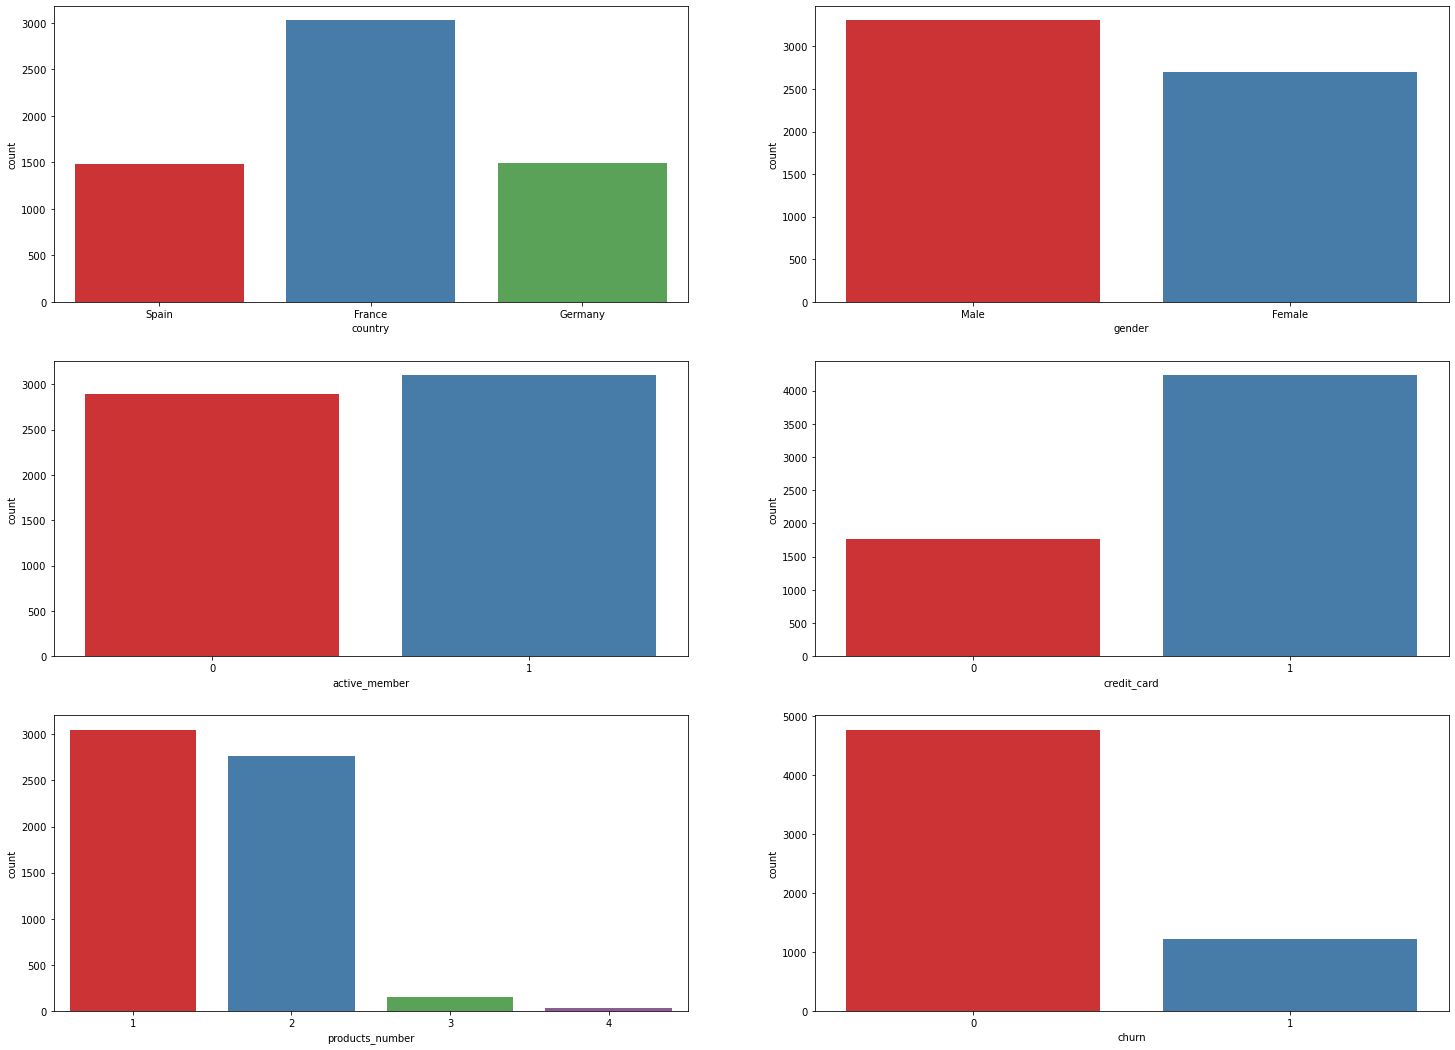

In [19]:
#Analysing categorical variables using my predefined module stored in the wrangle file
wrangle.plot_cat_vars(train)

## Quantitative Variables

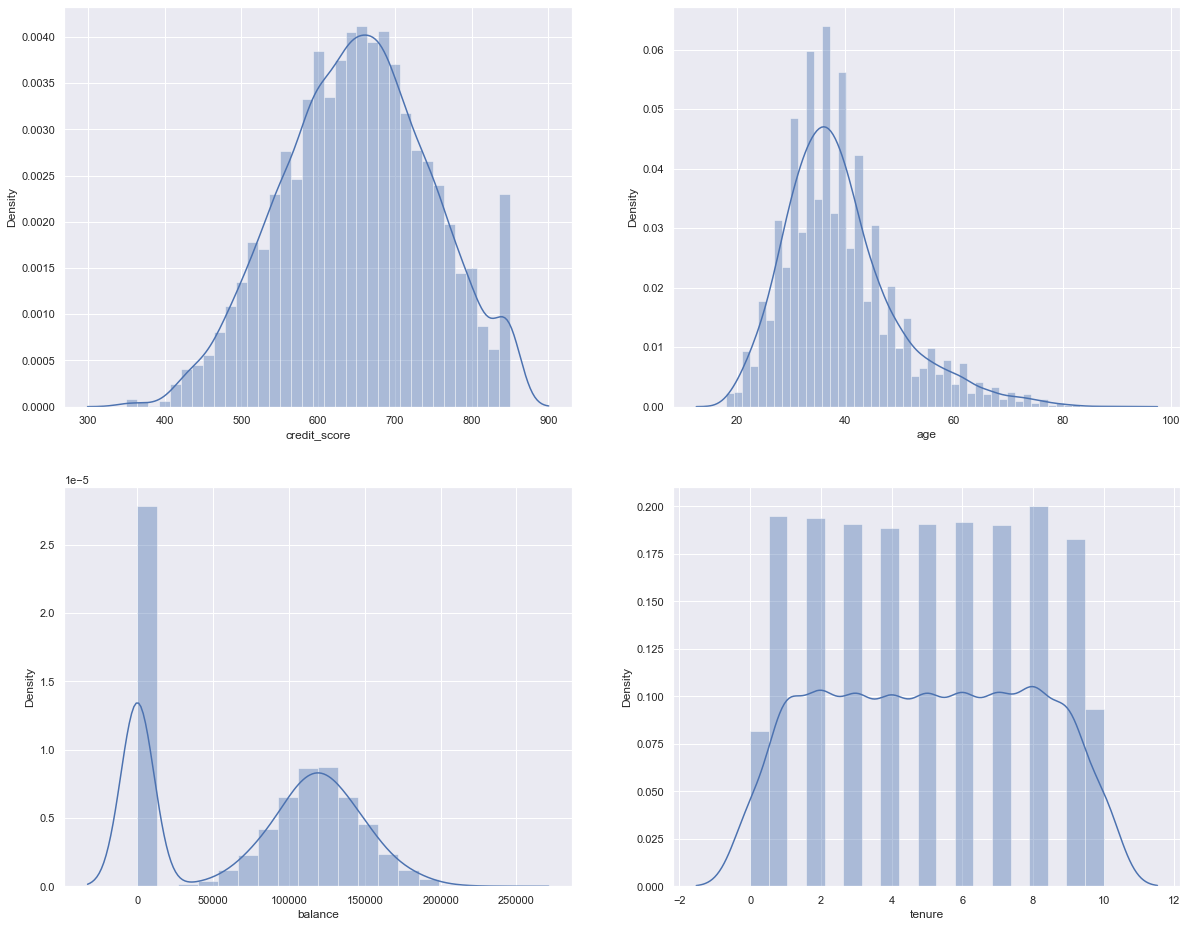

In [20]:
#Analysing quantitative variables using my predefined module stored in the wrangle file
wrangle.plot_quant_vars(train)

## Takeaways:
Looking at our categorical variables:
- We can see that 50% of customers are predominantly from France, and about 25% from Spain and about 25% from Germany
- We can also see a slight amount of male customers greater than female
- We also see slightly more active members than are non active members
- we can also verify that most customers have credit card, therefore most transactions are made by credit card
- looking at the variable product_number, we can see that we have more of products 1 and 2 than the rest.
- when we look at our target variable - churn we can see that we have much more customers leaving.

Looking at our quantitative variables:
- We can see that our credit score variable has a practically normal distribution
- Credit score observation: most frequency is in 600-700 score range
- A look at the age, most people in our base are between ages 20 and 40 years old
- We can also see on the balance that a large number of people who have no value on the balance sheet
- A look at tenure we can see that it has well distributed values

## Heatmap

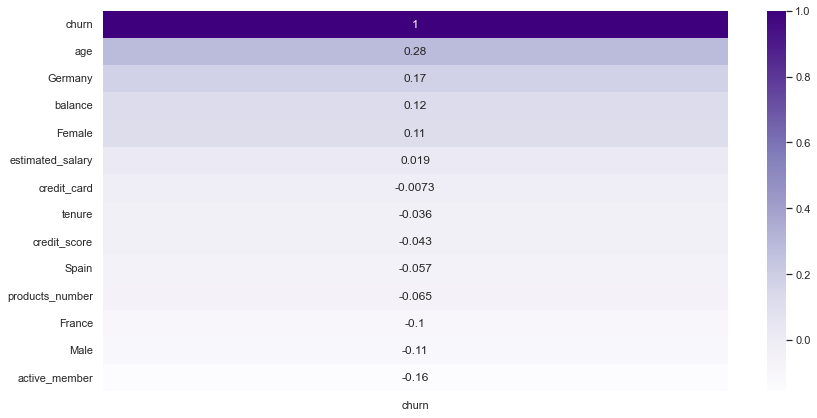

In [21]:
#checking correlation between variables.
correlation = train.corr()[["churn"]].sort_values(by='churn', ascending=False)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True,cmap='Purples')
plt.show()

## Takeaway

- Here, I analyzed 14 factcors using correlation matrix, which may contribute to the customer churn. The studied factors include credit score, age, tenure, balance, products number, credit card, active member, estimated salary, churn, France, Germany, Spain, Female, Male.

- Result: All the correlation coefficients between the factors and outcome of churn are small. But of all these factors, four factors (age, Germany, balance, Female) show relative strong correlation with the outcome of churn.

## Bivariate Analysis

In [22]:
#categorical & quantitative variables
cat_var = ['country','gender','active_member', 'credit_card', 'products_number','churn' ]
target = 'churn'
cat_vars2=['country','gender','active_member', 'credit_card', 'products_number']
quant_var = ['credit_score', 'balance', 'estimated_salary', 'age', 'tenure']

In [23]:
def run_chi2(train, cat_var, churn):
    observed = pd.crosstab(train[cat_var], train[churn])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

         chi2       p-value  degrees of freedom
0  182.824048  1.996468e-40                   2 churn       0    1
country           
France   2533  494
Germany  1004  486
Spain    1240  243              0           1
0  2409.996500  617.003500
1  1186.288333  303.711667
2  1180.715167  302.284833
        chi2       p-value  degrees of freedom
0  76.730585  1.959451e-18                   1 churn      0    1
gender           
Female  2010  686
Male    2767  537              0           1
0  2146.465333  549.534667
1  2630.534667  673.465333
         chi2       p-value  degrees of freedom
0  145.037875  2.107078e-33                   1 churn             0    1
active_member           
0              2119  779
1              2658  444           0        1
0  2307.291  590.709
1  2469.709  632.291
       chi2   p-value  degrees of freedom
0  0.280388  0.596447                   1 churn           0    1
credit_card           
0            1398  368
1            3379  855              0     

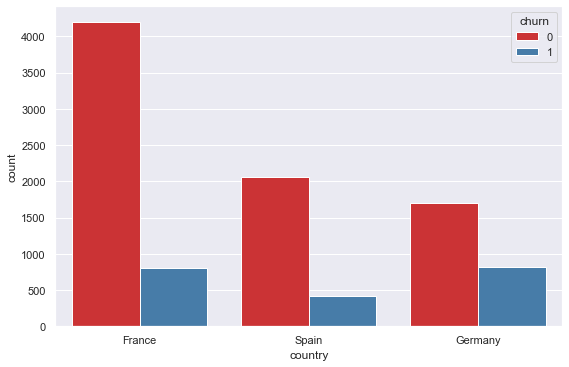

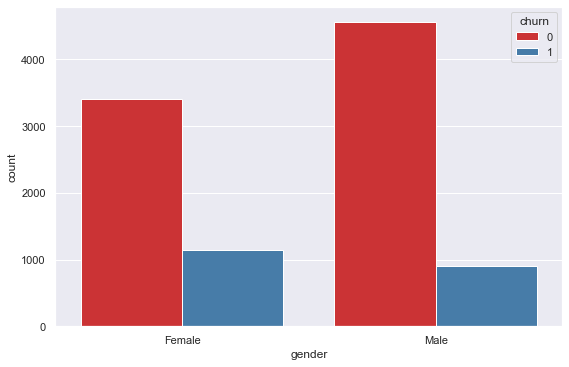

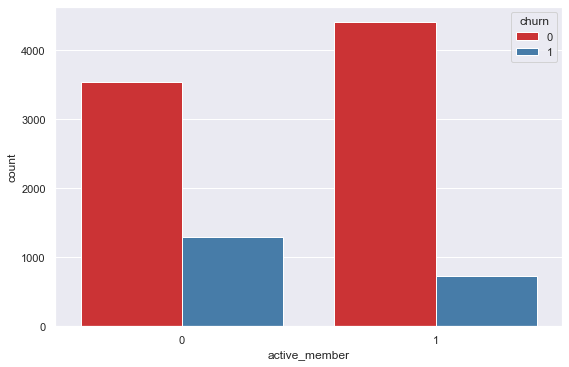

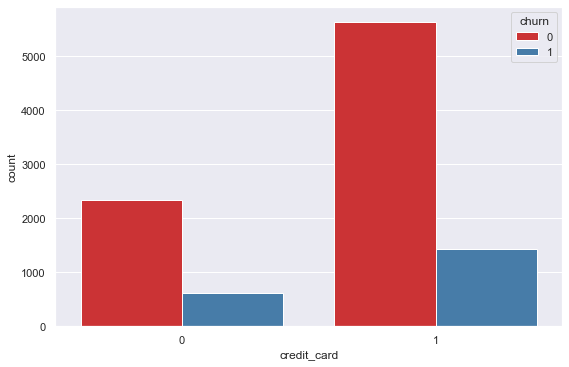

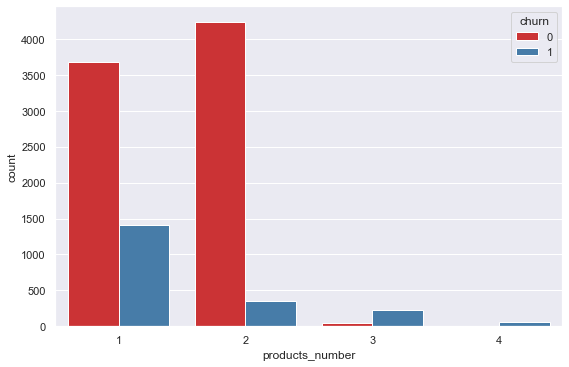

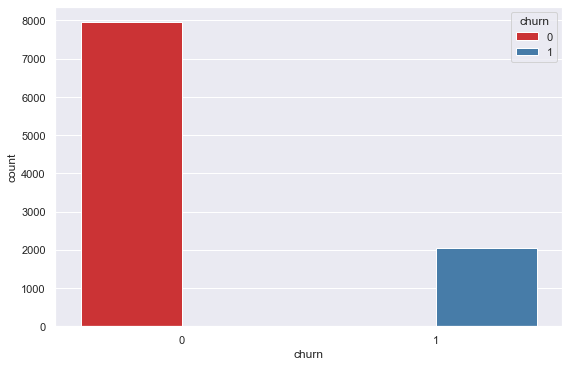

In [24]:
for var in cat_var:
    chi2_summary, observed, expected = run_chi2(train, var, "churn")
    print (chi2_summary, observed, expected)
    plt.figure(figsize = (20,20))
    plt.subplot(3,2,1)
    sns.countplot(x = var, hue= 'churn', palette='Set1', data = df)


## Takeaways
- Country: France has the highest churn rate compared to other countries Spain and Germany
- Gender: Male customers are easier to churn than female customers.
- Active member: they have a high churn rate.
- Credit card: Customers with credit card have a high churn rate
- Product number: Product numbers 1 and 2 are not doing well in the market

# IV. Modeling

In [25]:
#X will be features
#y will be our target variable
features = ["France","Germany", "Spain", "Male","Female", "balance","age","estimated_salary"]

X_train = train[features]
y_train = train.churn
X_validate = validate[features]
y_validate = validate.churn
X_test = test[features]
y_test = test.churn


In [26]:
X_train.head(2)

,France,Germany,Spain,Male,Female,balance,age,estimated_salary
4053,0,0,1,1,0,0.0,51,153917.41
9797,0,0,1,1,0,0.0,40,194792.42


## Establish a Baseline

In [27]:
#baseline prediction:baseline is the mode value
y_train.value_counts()

0    4777
1    1223
Name: churn, dtype: int64

In [28]:
baseline_accuracy = (y_train == 0).mean()
print('The churn baseline accuracy is:', baseline_accuracy)

The churn baseline accuracy is: 0.7961666666666667


## Model 1: Decision Tree

Accuracy of train: 81.57%
Accuracy of validate: 81.70%


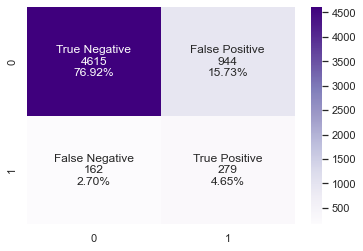

In [29]:
# make the thing
clf = tree.DecisionTreeClassifier(max_depth = 4, random_state = 123)
# fit the thing
clf.fit(X_train, y_train)
# use the thing
pred = clf.predict(X_train)
accuracy_train = clf.score(X_train, y_train)
accuracy_validate = clf.score(X_validate, y_validate)
print("Accuracy of train:", '{:.2%}'.format(accuracy_train))
print("Accuracy of validate:", '{:.2%}'.format(accuracy_validate))
cf_matrix = confusion_matrix(pred, y_train)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
plt.show()

## Model 2: Random Forest

Accuracy of train: 79.62%
Accuracy of validate: 79.65%


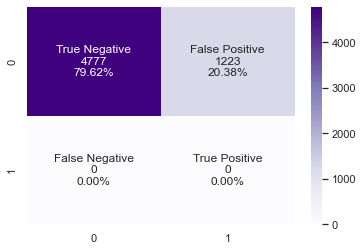

In [30]:
# make the thing 
rf = RandomForestClassifier(min_samples_leaf = 6, max_depth = 3)
# fit the thing
rf.fit(X_train, y_train)
# use the thing
pred = rf.predict(X_train)
accuracy_train = rf.score(X_train, y_train)
accuracy_validate = rf.score(X_validate, y_validate)
print("Accuracy of train:", '{:.2%}'.format(accuracy_train))
print("Accuracy of validate:", '{:.2%}'.format(accuracy_validate))

cf_matrix = confusion_matrix(pred, y_train)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
plt.show()

### Model 3: Logistic Regression

Accuracy of train: 79.62%
Accuracy of validate: 79.65%


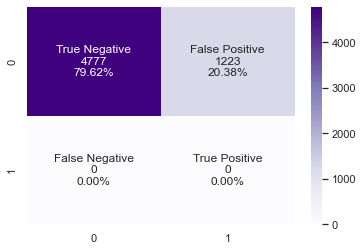

In [31]:
# make the thing 
logit = LogisticRegression() 
# fit the thing
logit.fit(X_train, y_train)
# use the thing
pred = logit.predict(X_train)

accuracy_train = logit.score(X_train, y_train)
accuracy_validate = logit.score(X_validate, y_validate)
print("Accuracy of train:", '{:.2%}'.format(accuracy_train))
print("Accuracy of validate:", '{:.2%}'.format(accuracy_validate))


cf_matrix = confusion_matrix(pred, y_train)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
plt.show()

## TEST Models

In [32]:
# Decision Tree model has the best accuracy of 80.43%, let's do a test on it
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'
        .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on test set: 0.81


### Takeaway
When we run the test data, the accuracy for Decision Tree model train is maintained at 81%. Therefore, the model has no data overfit.


## Conclusion and key takeaways